## Soal 1

In [25]:
# membaca file txt
myfile = open('soal1.txt')
soal1 = myfile.read()
soal1

'pesien epuik innesia unanunan epuik innesia n taun tentan aanan paktek npi an pesainan usaa tiak seat enan aat tuan an aa esa pesien epuik innesia enian aaa peanunan ian ekni aus iaakan kepaa teuuna keseateaan akat easakan panasia an unan unan asa aa ekasi aa ian ekni enenaki aana kesepatan an saa ai setiap aa neaa untuk epatisipasi i aa pses puksi an peasaan aan an atau asa aa iki usaa an seat eekti an eisien seina apat enn petuuan ekni an ekeana ekni pasa an aa aa setiap an an eusaa i innesia aus eaa aa situasi pesainan an seat an aa seina tiak eniukan aana peusatan kekuatan ekni paa peaku usaa tetentu enan tiak teepas ai kesepakatan an tea iaksanakan e neaa epuik innesia teaap peanian peanian intenasina aa untuk euukan seaaiana an iaksu aa uu a uu  an uu  atas usu inisiati ean peakian akat peu isusun unanunan tentan aanan paktek npi an pesainan usaa tiak seat eninat pasa aat pasa aat pasa aat an pasa  unanunan asa  enan pesetuuan ean peakian akat epuik innesia eutuskan enetapkan un

In [11]:
#no 1.1 Ada berapakah total kata unik yang ada pada file tersebut?
len(soal1.split())

4444

In [17]:
#no 1.2 Kata apakah yang kemunculannya tertinggi ke-6 pada file tersebut?
from collections import Counter
kamus = Counter(soal1.split()) # split untuk memisahkan kata, disini untuk mencari kata yang paling sering muncul dari kalimat
kamus = [[kamus[_],_]for _ in kamus] # _ sebuah variabel bebas; mengubah kalimat_panjang ke bentuk dictionary list
kamus = sorted(kamus) # mengurutkan dari kata paling sedikit muncul
print(kamus[-6][1]) 

aa


In [21]:
#no 1.3 Carilah jumlah kombinasi huruf yang berakhiran huruf vokal secara regex?
import re
hasil = re.findall('\w+[aiueo]', soal1) # mencari kombinasi huruf yang berakhiran huruf vokal 
print(len(hasil)) #jumlah kombinasi huruf yang berakhiran huruf vokal

3998


In [24]:
#no 1.4 Carilah jumlah kombinasi huruf yang diawali huruf 'p' dan diakhiri huruf 'p'.

hasil2 = re.findall('p\w+p', soal1) # mencari kombinasi huruf yang berakhiran huruf vokal 
print(len(hasil2)) #jumlah kombinasi huruf yang berakhiran huruf vokal

21


## Soal 2


In [187]:
# membaca file train 
import pandas as pd
ini = pd.read_csv('soal2_train.csv')
ini

,sentimen,kalimat
0,0,pesien epuik innesia unanunan epuik innesia n ...
1,1,npi an pesainan usaa tiak seat enan aat tuan a...
2,0,esa pesien epuik innesia enian aaa peanunan ia...
3,0,kepaa teuuna keseateaan akat easakan panasia a...
4,0,ekasi aa ian ekni enenaki aana kesepatan an sa...
...,...,...
345,0,seaaiana iaksu aa pasa aat tea epunai kekuatan...
346,0,putusan kisi seaaiana iaksu aa aat iintakan pe...
347,0,neei a iii sanksi aian petaa tinakan ainistati...
348,1,enatukan sanksi eupa tinakan ainistati teaap p...


In [188]:
# mendeklarasikan variabel x dan y
y = ini.values[:,0].astype(int)
x = ini.values[:,1]
x

array(['pesien epuik innesia unanunan epuik innesia n taun tentan aanan paktek',
       'npi an pesainan usaa tiak seat enan aat tuan an aa',
       'esa pesien epuik innesia enian aaa peanunan ian ekni aus iaakan',
       'kepaa teuuna keseateaan akat easakan panasia an unan unan asa aa',
       'ekasi aa ian ekni enenaki aana kesepatan an saa ai setiap',
       'aa neaa untuk epatisipasi i aa pses puksi an peasaan aan',
       'an atau asa aa iki usaa an seat eekti an eisien',
       'seina apat enn petuuan ekni an ekeana ekni pasa an aa',
       'aa setiap an an eusaa i innesia aus eaa aa situasi',
       'pesainan an seat an aa seina tiak eniukan aana peusatan kekuatan',
       'ekni paa peaku usaa tetentu enan tiak teepas ai kesepakatan an',
       'tea iaksanakan e neaa epuik innesia teaap peanian peanian intenasina aa',
       'untuk euukan seaaiana an iaksu aa uu a uu an uu',
       'atas usu inisiati ean peakian akat peu isusun unanunan tentan aanan',
       'paktek npi an pes

In [189]:
# TFIDF dengan data file training 
from sklearn.feature_extraction.text import TfidfVectorizer
otakTFIDF = TfidfVectorizer()
otakTFIDF.fit(x)
x = otakTFIDF.transform(x).toarray() # merubah x ke bentuk angka
x

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.21564909, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.21916529, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.13884384, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [193]:
# membagi data training  
batas = x.shape[0]*8//10 # 90% untuk training
x_train = x[ :batas]
x_test = x[batas: ]
y_train = y[ :batas]
y_test= y[batas: ]

In [194]:
# menggunakan knn untuk memprediksi nilai y pada soal2_test
# mencari nilai n yang tertinggi dengan perulangan
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

sc=[]
for i in range(3,10):
  otak = KNeighborsClassifier(n_neighbors=i) # 4 karena pada status berisi 3 jenis maka +1.
  otak.fit(x_train, y_train)
  nilai = accuracy_score(otak.predict(x_test), y_test)
  sc.append(nilai)

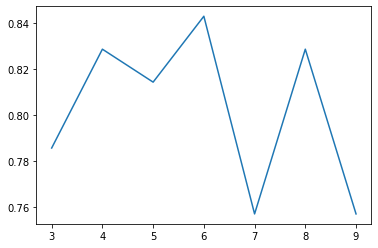

In [195]:
# menampilkan nilai akurasi yang sudah disimpan
import matplotlib.pyplot as plt

plt.plot(range(3,10),sc)

In [196]:
# membuat otak fix dengan nilai n tertinggi
otakfix = KNeighborsClassifier(n_neighbors=6) 
otakfix.fit(x_train, y_train)
accuracy_score(otakfix.predict(x_test), y_test)

0.8428571428571429

In [210]:
itu = pd.read_csv('soal2_test.csv')
itu

,kalimat
0,apenetapan peataan peanian seaaana iaksu aa pa...
1,an pasa an atau peinta kepaa peaku usaa untuk ...
2,etika seaaiana iaksu aa pasa an atau peinta ke...
3,untuk enentikan keiatan an teukti eniukan pakt...
4,pesainan usaa tiak seat an atau euikan asaakat...
5,kepaa peaku usaa untuk enentikan penaaunaan ps...
6,peataan atas penaunan atau peeuan aan usaa an ...
7,aa pasa an atau penetapan peniaaan anti ui an ...
8,ena seenaenana p satu iia upia an setinitinina...
9,ia iia upia aian keua piana pkk pasa peanaan t...


In [198]:
from sklearn.feature_extraction.text import TfidfVectorizer
otakTFIDF = TfidfVectorizer()
otakTFIDF.fit(itu.values[:,0])
hasil = otakTFIDF.transform(itu.values[:,0]).toarray() # merubah x ke bentuk angka
hasil

array([[0.22365196, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.28132207, 0.        ,
        0.25403344],
       [0.26116914, 0.        , 0.        , ..., 0.        , 0.        ,
        0.2444493 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20658071, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20308354, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [199]:
hasil.shape

(54, 214)

In [209]:
x_test2 = hasil

In [208]:
y_pred = otakfix.predict(x_test2)
y_pred

ValueError: ignored